In [ ]:
import pandas as pd
import numpy as np

url = "https://raw.githubusercontent.com/DomMcOyle/FAIKR3-Project/main/data/clean_data.csv?token=GHSAT0AAAAAABRL6KH4BZ3NIW66OUBEC2VIYSAQT7Q"
df = pd.read_csv(url)

df.head()
"""
da eliminare: ID, work_phone, phone, email, years_employed, occupation_type, housing_type, 
ok: gendro, unemploued, account_length, age, income_type, education_type, family status
da tenere: own_car, own_property, Num_children,	Num_family, total_income, target
"""


In [14]:
df2 = df.drop(["ID", "Work_phone", "Phone", "Email", "Years_employed", "Occupation_type", "Housing_type"], axis=1)

df2["Age"] = df2["Age"].apply(np.floor)
df2["Age"] = df2["Age"].astype(np.int8)

df2.head()


,Gender,Own_car,Own_property,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Income_type,Education_type,Family_status,Target
0,1,1,1,0,0,2,15,427500.0,32,Working,Higher education,Civil marriage,1
1,1,1,1,0,0,2,29,112500.0,58,Working,Secondary / secondary special,Married,0
2,0,0,1,0,0,1,4,270000.0,52,Commercial associate,Secondary / secondary special,Single / not married,0
3,0,0,1,1,0,1,20,283500.0,61,Pensioner,Higher education,Separated,0
4,1,1,1,0,0,2,5,270000.0,46,Working,Higher education,Married,0


In [ ]:
print(pd.unique(df2["Num_children"]))
print(pd.unique(df2["Num_family"]))
print(pd.unique(df2["Account_length"]))
print(pd.unique(df2["Education_type"]))
print(pd.unique(df2["Income_type"]))
print(pd.unique(df2["Family_status"]))


In [ ]:
def discretize_num(x):
    if x >=thresh:
      return str(thresh) + "+"
    else:
      return str(x)

thresh = 3
df3 = df2.copy()
df3["Num_children"] = df2["Num_children"].apply(discretize_num)



In [ ]:
thresh = 4
df3["Num_family"] = df2["Num_family"].apply(discretize_num)

np.unique(df3["Num_family"], return_counts=True)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8edc745910>]],
      dtype=object)

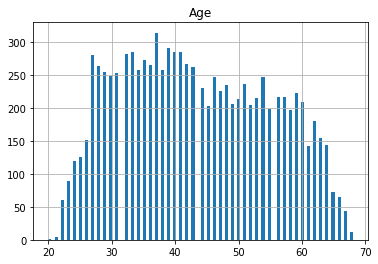

In [41]:
np.unique(df3["Age"], return_counts=True)
df2.hist("Age", bins=100)
# >30, 30-39, 40-49, 50-59, >=60

In [32]:
def discretize_age(x):
  if x<30:
    return "<30"
  elif x<40:
    return "30-39"
  elif x<50:
    return "40-49"
  elif x<60:
    return "50-59"
  else:
    return "60>="  

df3["Age"] = df2["Age"].apply(discretize_age)
np.unique(df3["Age"], return_counts=True)


(array(['30-39', '40-49', '50-59', '60>=', '<30'], dtype=object),
 array([2724, 2445, 2169, 1021, 1350]))

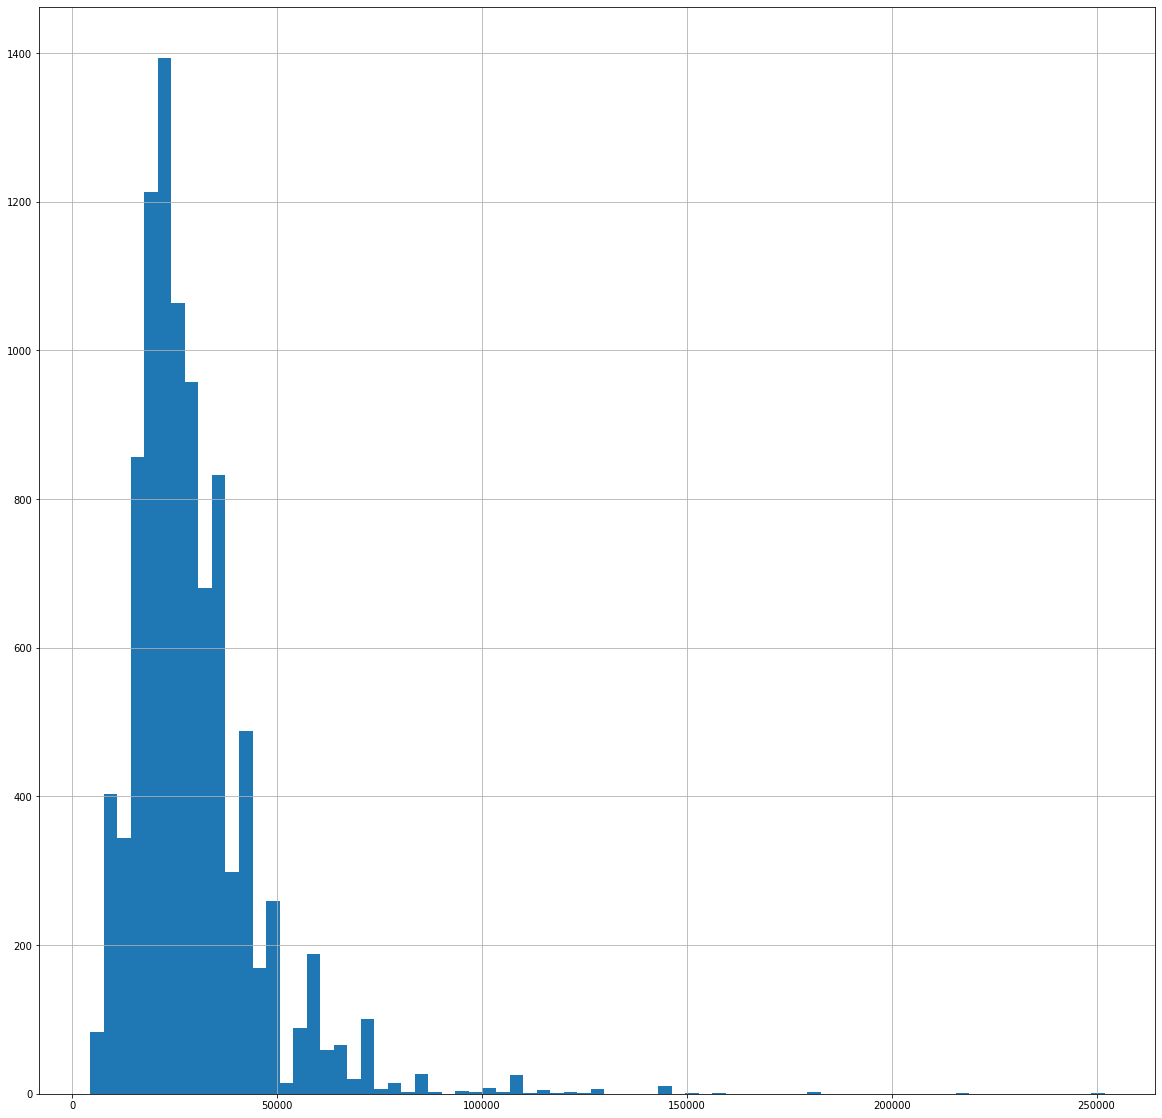

In [50]:
df3.hist("Total_income", bins=75, figsize=(20,20))

In [52]:
#df3.hist("Total_income", bins=75, figsize=(20,20))
#134997 - > 192600
def discretize_income(x):
  if x < 134997:
    return "low"
  elif x < 192600:
    return "medium"
  else:
    return "high"

df3["Total_income"] = df2["Total_income"].apply(discretize_income)
np.unique(df3["Total_income"], return_counts=True)


(array(['high', 'low', 'medium'], dtype=object), array([3393, 2939, 3377]))

In [54]:
from google.colab import files

df3.to_csv('processed.csv', encoding = 'utf-8-sig') 
files.download('processed.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>